# Problem Statement - Original Case Study -  Part 1
It is now time to start using everything you have learned in the first half of this class. You will begin developing your own original analysis case study.

Start by providing a brief narrative describing an original idea for an analysis/model building problem. Find appropriate data for your case study.

Create some graphs to begin your graphical analysis and write the step-by-step instructions for completing the graphical analysis of your case study. Keep in mind that your analysis may look very different from the tutorial analysis. Your analysis should be adapted to fit your problem.

Submit your entire Case Study Part I including your narrative, data, notebook (if applicable), and any code to the submission link. 
Post Part I of your case study, excluding any code, to the Case Study Part I discussion forum.

# Solution : Original Case Study - Part 1

The data has been pulled from Kaggle Link below
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews


## Context
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with "retailer".

## Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

1. Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
2. Age: Positive Integer variable of the reviewers age.
3. Title: String variable for the title of the review.
4. Review Text: String variable for the review body.
5. Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
6. Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
7. Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
8. Division Name: Categorical name of the product high level division.
9. Department Name: Categorical name of the product department name.
10. Class Name: Categorical name of the product class name.


## Abstract
Understanding sentiments of the customers is of huge importance in marketing strategies today. Be it retail, banking, insurance or any sector, if we or a business is not targetting the right group or customer segment, we may be overspending on marketing. Not only analyzing this gives companies an insight as to how customers perceive their products and/or services, but also gives them an idea on how to improve their offers. This study attempts to understand the correlation of different variables in customer reviews on a women clothing e-commerce, and to classify each review whether it recommends the reviewed product or not and whether it consists of positive, negative, or neutral sentiment. 

To achieve these goals, we will utilize different techniques used in our class so far and will improve the study with each passing week. We will be analyzing the data for recommendation and sentiment classification. 




In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import yellowbrick

In [3]:
# Loading the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
# Cleaning up the data.
# dropping first column as it doesn't seem to have any relevant information, just the count
# Also removing the rows, if certain values are null. Assuming them as mandatory, 
# without which we will not be able to analyze.
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [5]:
# Checking the shape
df.shape

(22628, 10)

In [6]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [7]:
# Adding a label, to identify positive and negative reviews.
# Assuming anything greater than 3 as positive.
df['Label'] = 0

In [8]:
df.loc[df.Rating >= 3, ['Label']] = 1

In [9]:
# Split review text to see number of words in each review.
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [10]:
df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
17774,1110,39,Flattering all around,This dress has all the hallmarks of a classic....,5,1,3,General,Dresses,Dresses,1,57
15190,868,64,NaN,I love this top!! very comfortable and versati...,4,1,0,General Petite,Tops,Knits,1,19
23351,1110,25,Flattering and feminine,Love everything about this dress except for th...,4,1,0,General Petite,Dresses,Dresses,1,57
23177,1094,29,Pretty,The fabric is great and the cut is flattering....,4,1,1,General,Dresses,Dresses,1,32
19260,1083,44,Beautiful classic,Could not let it pass at a sale price. got the...,5,1,1,General,Dresses,Dresses,1,52


In [11]:
# Below statistics describe the data and details about it.
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [12]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


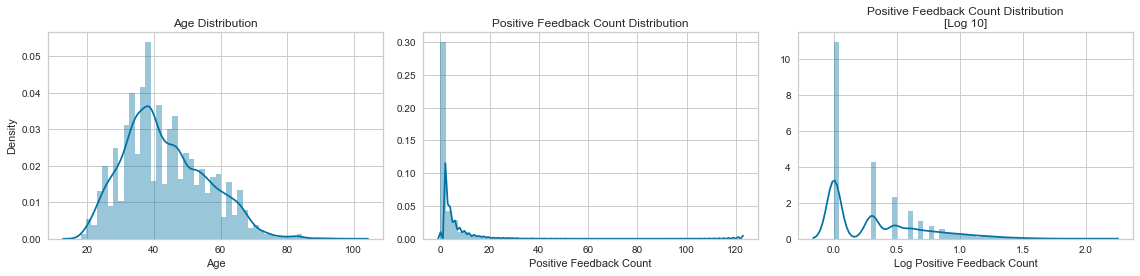

In [13]:
# Univariate

#Age and Positive Feedback Frequency Distributions

f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

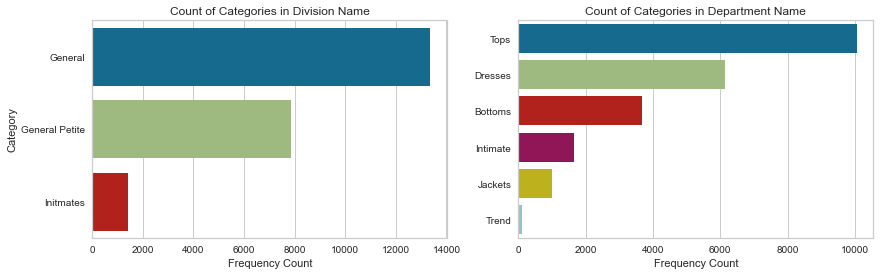

In [14]:
# Division and Department Distributions
# Plotting the data based on Division wise and Department wise distributions of this dataset.
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

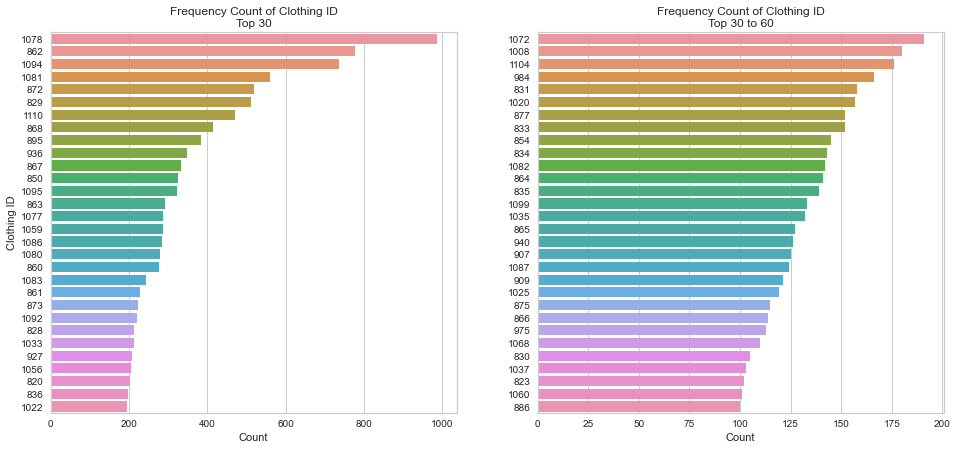

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0


In [15]:
# Clothing ID Frequency Distributions
# Clothing ID Category
f, axes = plt.subplots(1, 2, figsize=[16, 7])
num = 30
sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],
              order= df['Clothing ID'].value_counts()[:num].index, ax=axes[0])
axes[0].set_title('Frequency Count of Clothing ID\nTop 30')
axes[0].set_xlabel('Count')

sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[num:60].index)],
              order=df['Clothing ID'].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title('Frequency Count of Clothing ID\nTop 30 to 60')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')
plt.savefig('freqdist-clothingid-top60.png', format='png', dpi=600)
plt.show()

print('Dataframe Dimension: {} Rows'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078, 862,1094])].describe().T.drop('count',axis=1)

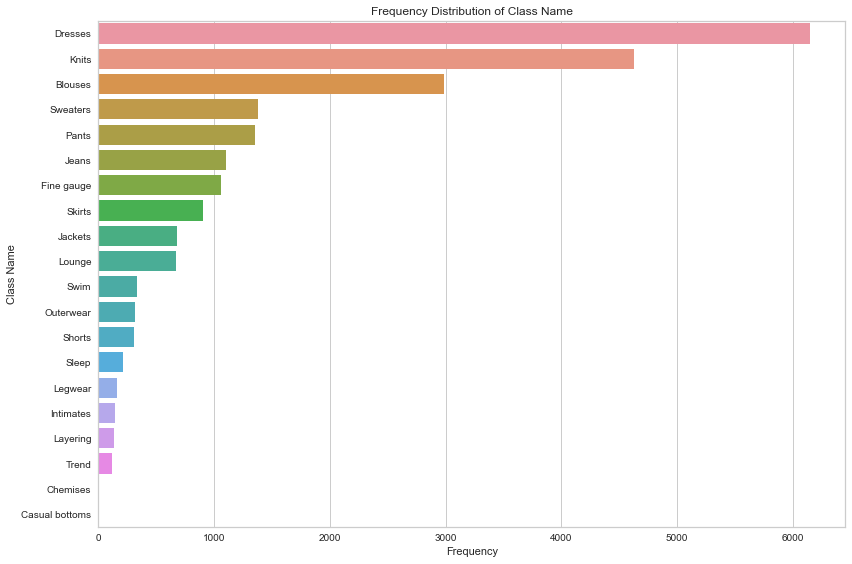

In [16]:
# Plotting the data based on Class Name distribution
plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()

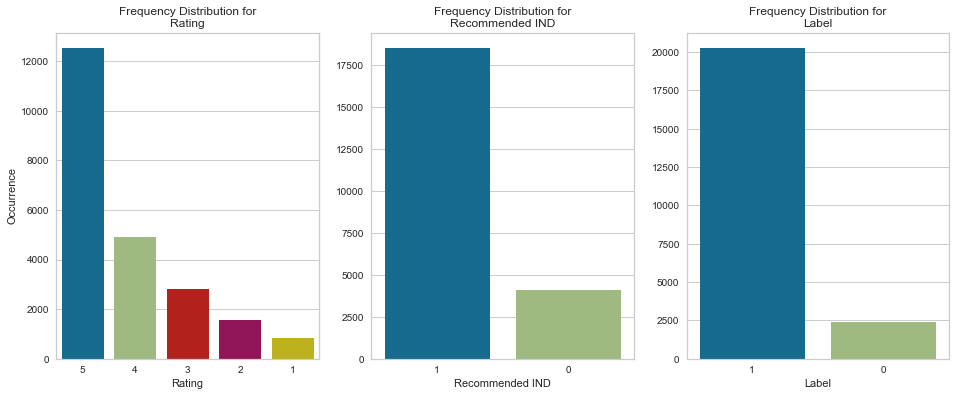

In [17]:
# Plotting for Rating, Recommended Ind and Label
cat_dtypes = ['Rating', 'Recommended IND', 'Label']
increment = 0
f, axes = plt.subplots(1, len(cat_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df, order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title('Frequency Distribution for\n{}'.format(cat_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

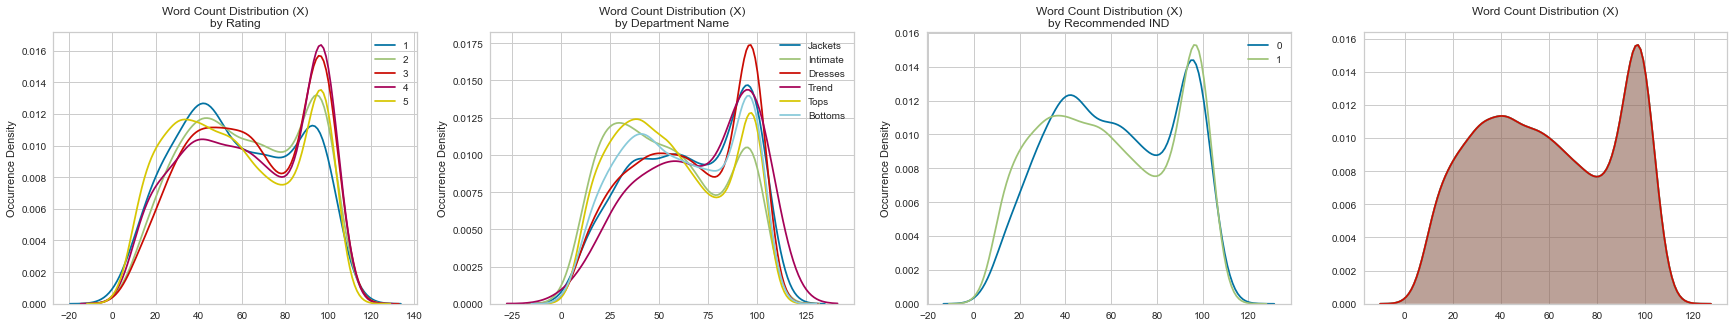


Total Word Count is: 1362476


count    22628.000000
mean        60.211950
std         28.533053
min          2.000000
25%         36.000000
50%         59.000000
75%         88.000000
max        115.000000
Name: Word Count, dtype: float64

In [18]:
# Word Count by Rating, Department Name, and Recommended IND
# Density Plots
f, axes = plt.subplots(1, 4, figsize=(30, 5), sharex=False)

for index, y in enumerate(['Rating', 'Department Name', 'Recommended IND']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(df['Word Count'][df[y]==x], label=x, shade=False, ax=axes[index])
        axes[index].set_title('{} Distribution (X)\nby {}'.format('Word Count', y))
    axes[index].set_ylabel('Occurrence Density')
    axes[index].set_xlabel('')
    
    # Plot 4
    axes[3].set_title('Word Count Distribution (X)\n')
    sns.kdeplot(df['Word Count'],shade=True,ax=axes[3])
    axes[index].set_xlabel("")
    axes[3].legend_.remove()
plt.savefig('wordcountdist-rating-deptname-recommended.png', format='png', dpi=300)
plt.show()

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
df['Word Count'].describe().T

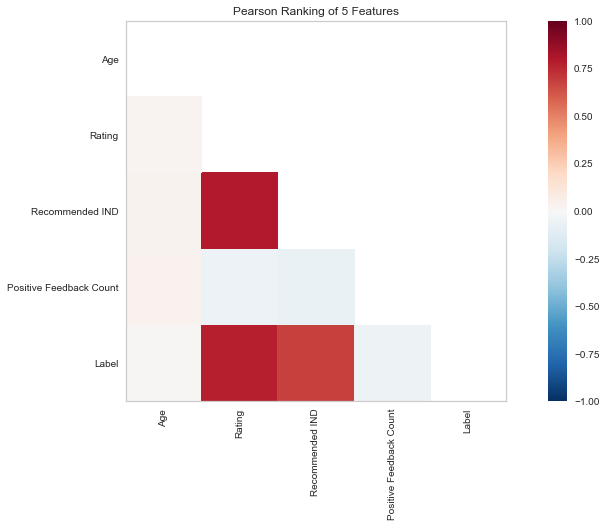

In [19]:
# To see if the data is correlated, make some Pearson Ranking charts
# The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)
# These results show there is correlation different different attributes
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# Getting columns names just for reference
#Age	Title	Review Text	Rating	Recommended IND	Positive Feedback Count	Division Name	Department Name	Class Name	Label

# Specify the features of interest
num_features = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Label']

# extract the numpy arrays from the data frame
X = df[num_features].values#as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
#plt.show()

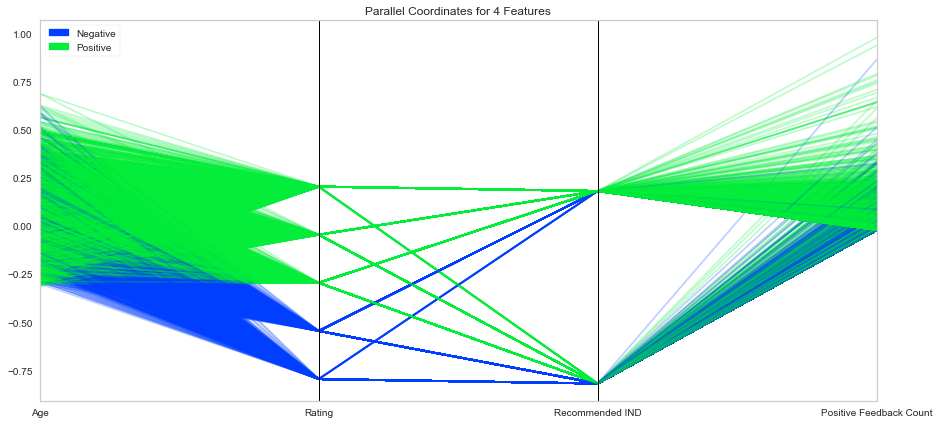

In [21]:
# Use Parallel Coordinates visualization to compare the distributions of numerical variables between 
# Reviews with positive feedback..where label =0 and 1
# Using the visualization from the earlier exercise
# Older people gave more positive feedbacks and better ratings  
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Negative', 'Positive']
num_features = ['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

# copy data to a new dataframe
data_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values#as_matrix()
y = df.Label.values#as_matrix()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show();

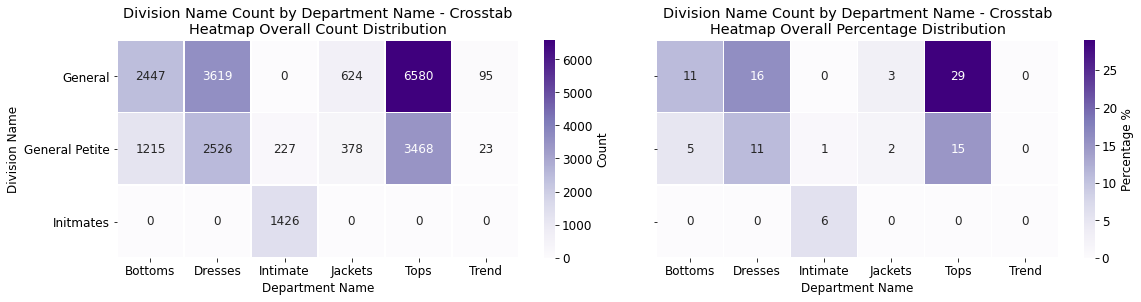

In [19]:
# Trying out heatmaps
# Displaying the same data as earlier but segregating based on other columns
# The two heatmaps are for 
# 1. Division Name Count by Department Name - by Count
# 2. Division Name Count by Department Name - by Percentage - normalized over entire population

f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
# This is only for counts
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Purples',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

# normalizing the crosstab over entire population - %age
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Purples',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname.png', format='png', dpi=300)
plt.show()

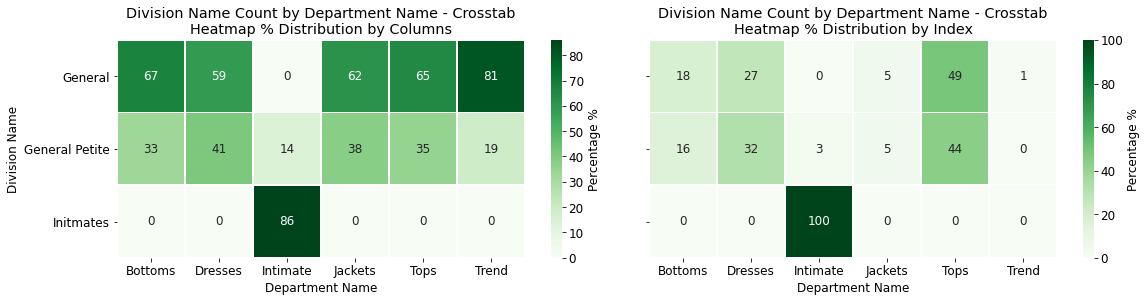

In [20]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
# normalizing over columns - %age
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

# normalizing over index - %age
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname-pivot.png', format='png', dpi=300)
plt.show()

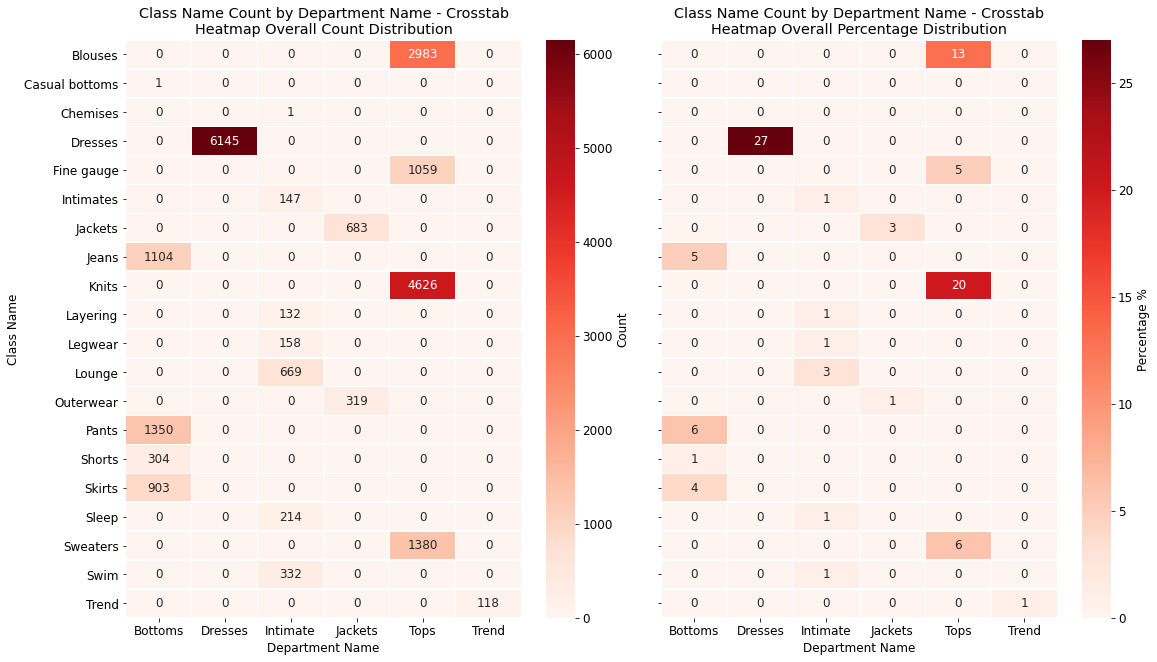

In [21]:
# The two heatmaps are for 
# 1. Class Name Count by Department Name - by Count
# 2. Class Name Count by Department Name - by Percentage - normalized over entire population
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Reds',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

# normalizing the crosstab over entire population - %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Reds',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname.png', format='png', dpi=300)
plt.show()

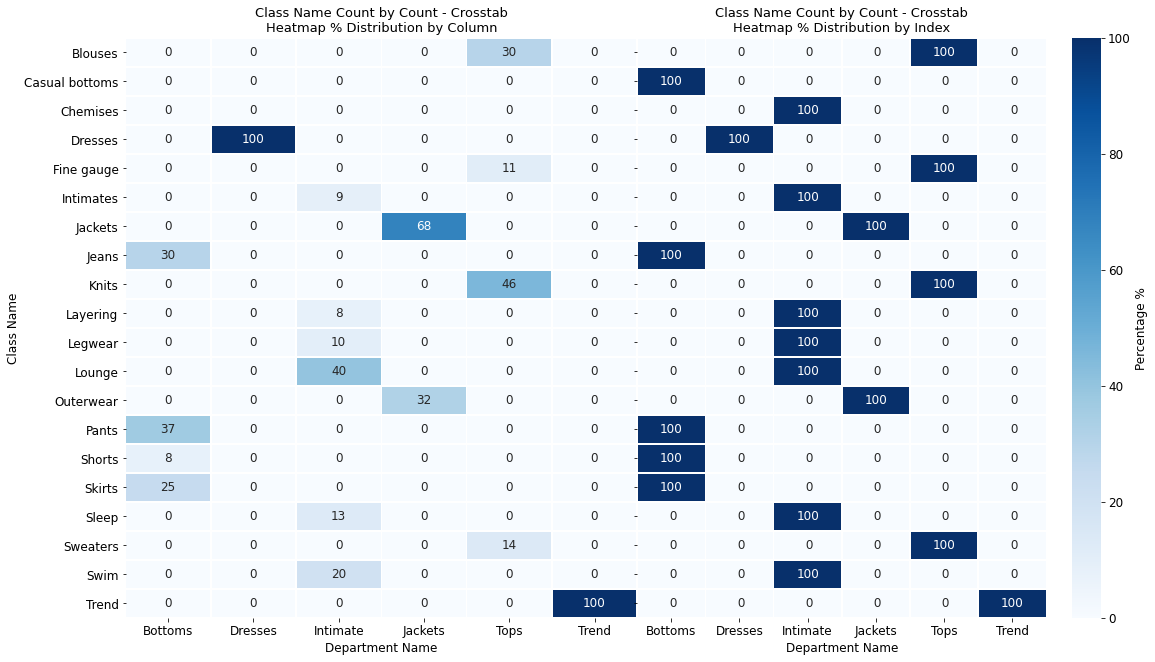

In [22]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
# normalizing over columns - %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False, cmap='Blues')

# normalizing over index - %age
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize=fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1],cmap='Blues',
                    cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname-pivot.png', format='png', dpi=300)
plt.show()

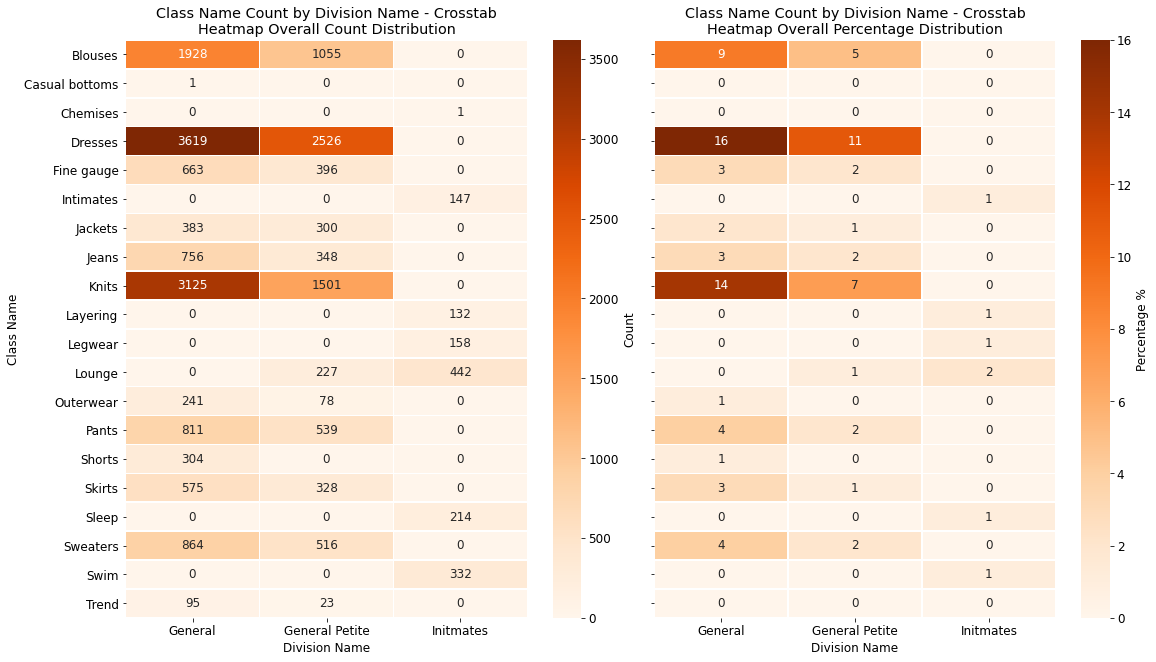

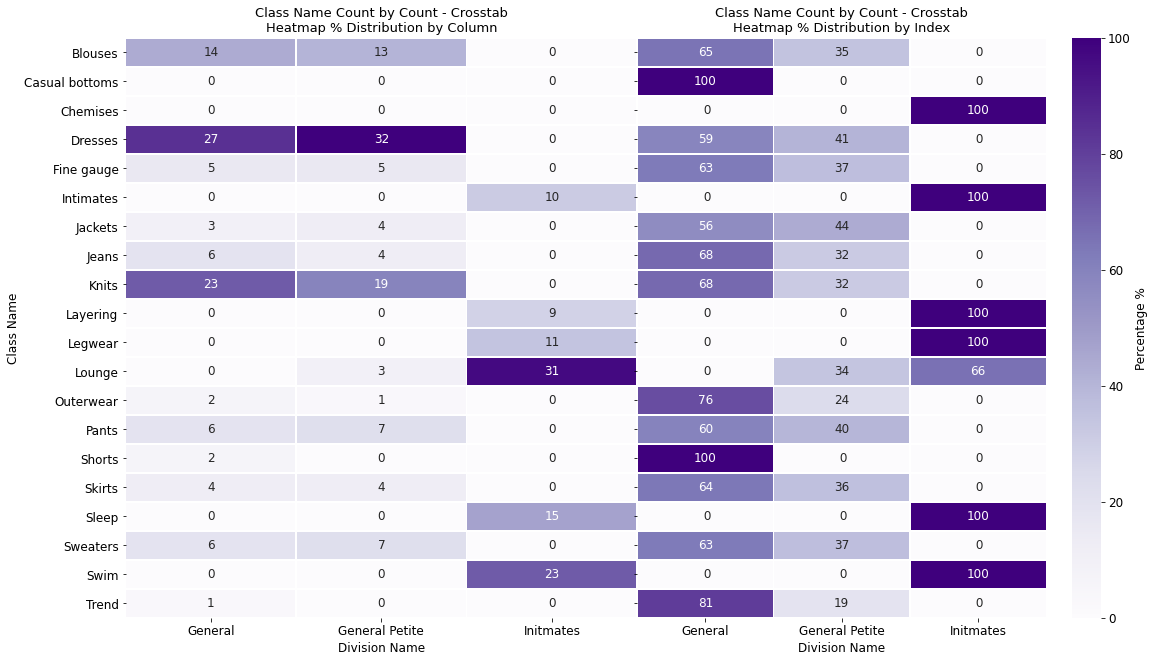

In [23]:
# The two heatmaps are for 
# 1. Class Name Count by Division Name - by Count
# 2. Class Name Count by Division Name - by Percentage - normalized over entire population
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')
# normalizing cross tab by overall population %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname.png', format='png', dpi=300)
plt.show()

# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
# normalizing cross tab by column %age
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False,cmap='Purples')
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
# normalizing cross tab by index row %age
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1], cmap='Purples',
                    cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname-pivot.png', format='png', dpi=300)

C:\softwares\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1974: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


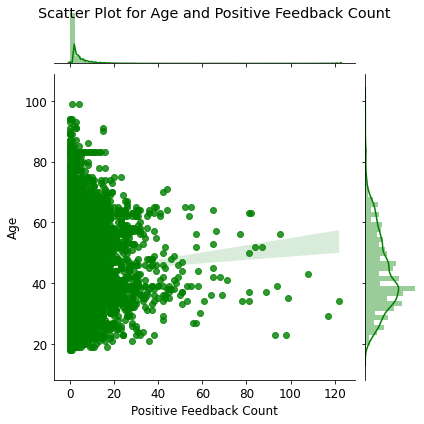

In [25]:
# This is the scatter plot for Age and Positive Feedback Count
def minmaxscaler(df):
    return (df - df.min()) / (df.max() - df.min())

def zscorenomalize(df):
    return (df - df.mean()) / df.std()

g = sns.jointplot(x=df['Positive Feedback Count'], y=df['Age'], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.savefig('positivefeedback-age.png', format='png', dpi=300)
plt.show()

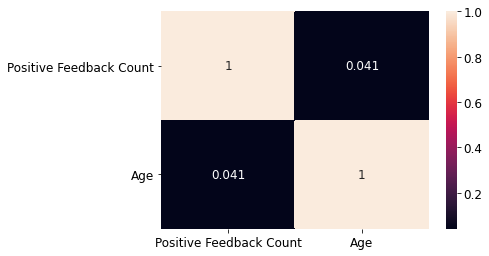

In [26]:
# Correlation using Heatmap for two attributes Age and Positive Feedback count
# Earlier did a similar heatmap for multiple attributes
sns.heatmap(df[['Positive Feedback Count', 'Age']].corr(), annot=True)

# Problem Statement -  Original Case Study - Part 2
Review and provide feedback to one of your classmate’s Case Study Part I assignments which are posted to the Case Study Part I discussion forum. Also review the feedback you receive on your Part I. Make any changes you think necessary.

Create Part II of your analysis case study project. In Part II, you should begin the dimensionality and feature reduction steps of your case study (feel free to modify these steps later if necessary). You can use any methods/tools you think are most appropriate. Again, keep in mind that this may look very different from what is done in the tutorial case study. You should do what makes sense for your project. Write the step-by-step instructions for completing the dimensionality/feature reduction. 

Submit parts I & II of your case study to the submissions link. Include your narrative, notebook (if applicable), data, and code.
Post parts I & II of your case study, excluding code, to the Case Study Part II disucssion forum.

# Problem Statement - Original Case Study - Part 3
Review and provide feedback to one of your classmate’s Case Study Part II assignments which are posted to the Case Study Part II discussion forum. Also review the feedback you receive on your part II assignment. Make any changes you think necessary.

Create Part III of your analysis case study project. In Part III, begin the process of model evaluation and selection (feel free to modify this later if necessary). You can use any methods/tools you think are most appropriate. Like in Parts I & II, this may look very different from the tutorial case study. In addition, write step-by-step instructions for performing the model evaluation and selection part of your case study.

Submit Parts I, II, and III of your case study to the to the submission link. Include your narrative, data, notebook (if applicable), and code.
Post your entire case study, excluding code, to the Case Study Part III discussion forum.
This is due by the end of Week 8. This is a cumulative project so it is imperative that you do not fall behind.

# Problem Statement - Original Case Study Analysis

Review and provide feedback to one of your classmate’s Case Study Part III assignment which are posted to the Case Study Part III discussion forum by the end of Week 9. Also review the feedback you receive on your Part III assignment. Make any changes you think necessary.

After reviewing your feedback and making any changes, post your entire case study (excluding code) to the Final Case Study discussion forum by the end of Week 10. 
Submit your entire case study via the submission link by the end of Week 10.
This is a cumulative project so it is imperative that you do not fall behind.

# Problem Statement - Final Project - Original Case Study Final Documentation

Review and provide feedback to one of your classmate’s updated case study assignment which are posted to the Final Case Study discussion forum by the end of Week 11. Also review the feedback you receive on your own case study. Make any changes you think necessary.


Submit the final documentation for your Original Analysis Case Study via the assignment link by the end of Week 12. Your final documentation should include the data used in your case study, all code, your notebook (if applicable) and a final report. Think about the final report as a summary of your findings that you would present to your supervisor. The final report should include the following:

Introduction to the problem
Organized and detailed summary of the three parts of your case study (include any important visuals in here)
Conclusion: What does the analysis/model building tell you? Do you have a recommendation based on these findings?
There is no length restriction on the final report. However, it should be detailed enough that someone with reasonable domain knowledge could follow what you have done, but it should not include everything you have done. You want to include only the important details/visuals/findings in your report